CNN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import torch.optim as optim
from torch.utils.data import DataLoader, Subset,random_split
from torchviz import make_dot

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)  
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3) 
        self.fc1 = nn.Linear(64*26*26, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)  

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3(x)) 
        x = F.max_pool2d(x, kernel_size=2, stride=2) 
        print("Conv1 output shape:", x.shape) 
        x = x.view(-1, 64*26*26) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

In [5]:
full_dataset = datasets.ImageFolder(r"D:\documents\datasets\covid\Covid19-dataset", transform=transform)

train_size = int(0.25 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_data, test_data = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


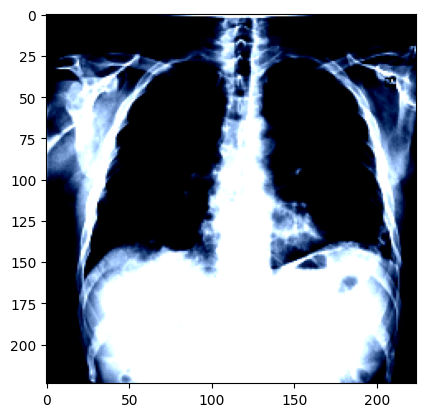

In [6]:
import matplotlib.pyplot as plt
import numpy as np


example_image, _ = full_dataset[0] 

example_image = np.transpose(example_image.numpy(), (1, 2, 0))

plt.imshow(example_image)
plt.show()


In [7]:
example_image.shape

(224, 224, 3)

In [8]:
model=CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=43264, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:

num_epochs = 5
lossarr=[]
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_data)
    lossarr.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    outputs = model(inputs) 
    dot = make_dot(outputs, params=dict(model.named_parameters()))
    dot.format = 'png'
    dot.render(f"model_graph_epoch_{epoch+1}")

Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([15, 64, 26, 26])
Epoch [1/5], Loss: 0.9660
Conv1 output shape: torch.Size([15, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([15, 64, 26, 26])
Epoch [2/5], Loss: 0.4548
Conv1 output shape: torch.Size([15, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([15, 64, 26, 26])
Epoch [3/5], Loss: 0.3924
Conv1 output shape: torch.Size([15, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([15, 64, 26, 26])
Epoch [4/5], Loss: 0.4022
Conv1 output shape: torch.Size([15, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output s

In [18]:
model.eval()
correct = 0
total = 0
lossarr1=[]
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        lossarr1.append(loss.item())
accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([32, 64, 26, 26])
Conv1 output shape: torch.Size([14, 64, 26, 26])
Accuracy on test set: 77.31%


In [17]:
print(lossarr)

[0.9660371428803552, 0.4548415466199947, 0.39240683181376396, 0.40221506923059874, 0.35361608825152435]


Conv1 output shape: torch.Size([2, 64, 26, 26])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 222, 222]             448
            Conv2d-2         [-1, 32, 109, 109]           4,640
            Conv2d-3           [-1, 64, 52, 52]          18,496
            Linear-4                  [-1, 120]       5,191,800
            Linear-5                   [-1, 84]          10,164
            Linear-6                    [-1, 4]             340
Total params: 5,225,888
Trainable params: 5,225,888
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 10.24
Params size (MB): 19.94
Estimated Total Size (MB): 30.75
----------------------------------------------------------------


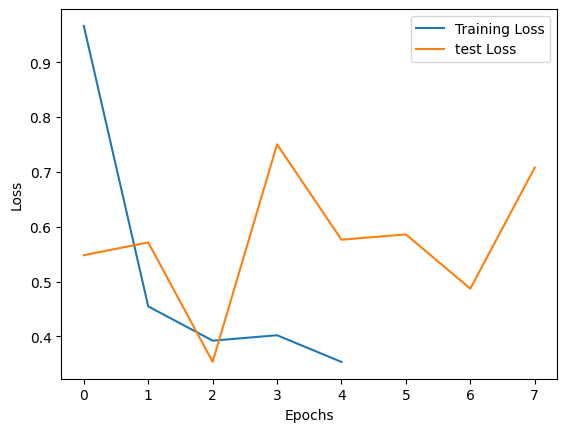

In [19]:
import matplotlib.pyplot as plt
from torchsummary import summary

summary(model,(3,224,224))
plt.plot(lossarr, label='Training Loss')
plt.plot(lossarr1, label='test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Alexnet

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

def alexnet_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (3, 3), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (11, 11), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
num_classes = 10

4422102/4422102 [==============================] - 3s 1us/step


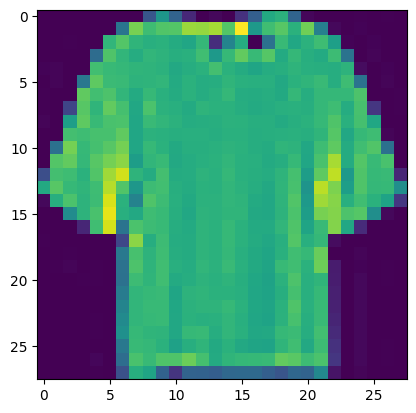

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[77])
plt.show()

In [23]:
model = alexnet_model((28, 28, 1), num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))




Epoch 1/5


469/469 [==============================] - 206s 436ms/step - loss: 0.7293 - accuracy: 0.7203 - val_loss: 0.4643 - val_accuracy: 0.8286
Epoch 2/5
469/469 [==============================] - 200s 427ms/step - loss: 0.4317 - accuracy: 0.8428 - val_loss: 0.4365 - val_accuracy: 0.8379
Epoch 3/5
469/469 [==============================] - 202s 430ms/step - loss: 0.3791 - accuracy: 0.8612 - val_loss: 0.4185 - val_accuracy: 0.8380
Epoch 4/5
469/469 [==============================] - 200s 426ms/step - loss: 0.3403 - accuracy: 0.8728 - val_loss: 0.4443 - val_accuracy: 0.8462
Epoch 5/5
469/469 [==============================] - 201s 428ms/step - loss: 0.3124 - accuracy: 0.8828 - val_loss: 0.3849 - val_accuracy: 0.8607


In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 6s 20ms/step - loss: 0.3849 - accuracy: 0.8607
Test accuracy: 0.8607000112533569


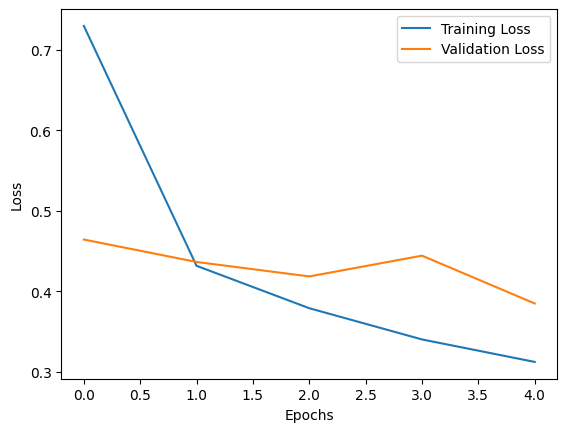

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 96)          960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         2973952   
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 384)         1327488   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 384)         0         
 g2D)                                                   

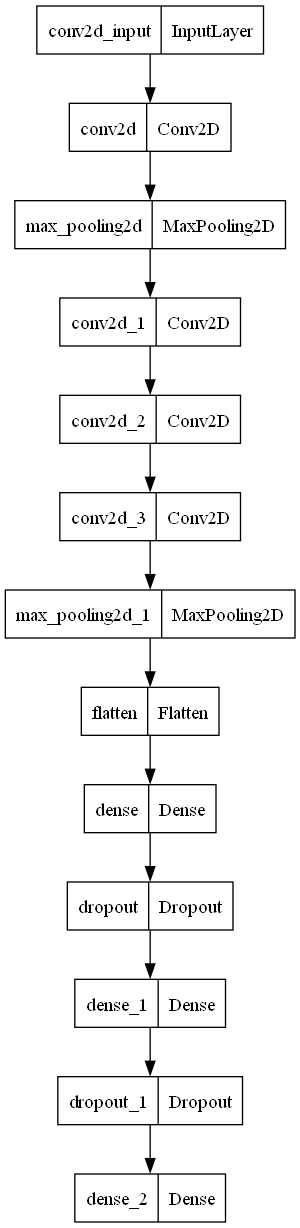

In [27]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png'
)

Resnet

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = ImageFolder(root=r"C:\Users\maha9\Downloads\archive (5)\Vegetable Images\train", transform=transform)

train_set, val_set = torch.utils.data.random_split(dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


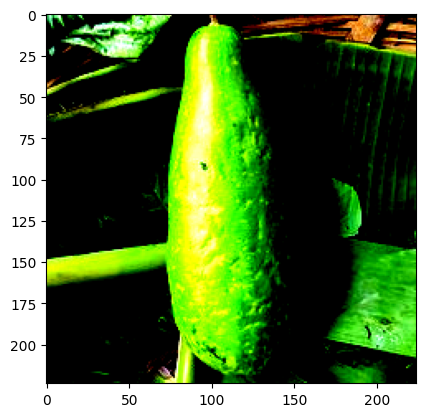

In [3]:
import matplotlib.pyplot as plt
import numpy as np


example_image, _ = train_set[7] 

example_image = np.transpose(example_image.numpy(), (1, 2, 0))

plt.imshow(example_image)
plt.show()

In [4]:
resnet = models.resnet18(pretrained=True)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters())

c:\Users\maha9\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\maha9\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\maha9/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [01:44<00:00, 448kB/s] 


In [5]:
from torchsummary import summary

summary(resnet, (3, 7,7))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 64, 4, 4]           9,408
       BatchNorm2d-2             [-1, 64, 4, 4]             128
              ReLU-3             [-1, 64, 4, 4]               0
         MaxPool2d-4             [-1, 64, 2, 2]               0
            Conv2d-5             [-1, 64, 2, 2]          36,864
       BatchNorm2d-6             [-1, 64, 2, 2]             128
              ReLU-7             [-1, 64, 2, 2]               0
            Conv2d-8             [-1, 64, 2, 2]          36,864
       BatchNorm2d-9             [-1, 64, 2, 2]             128
             ReLU-10             [-1, 64, 2, 2]               0
       BasicBlock-11             [-1, 64, 2, 2]               0
           Conv2d-12             [-1, 64, 2, 2]          36,864
      BatchNorm2d-13             [-1, 64, 2, 2]             128
             ReLU-14             [-1, 6

In [6]:
num_epochs = 5
l=[]
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        l.append(loss.item())
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.1114
Epoch [2/5], Loss: 0.1179
Epoch [3/5], Loss: 0.0057
Epoch [4/5], Loss: 0.0012
Epoch [5/5], Loss: 0.0481


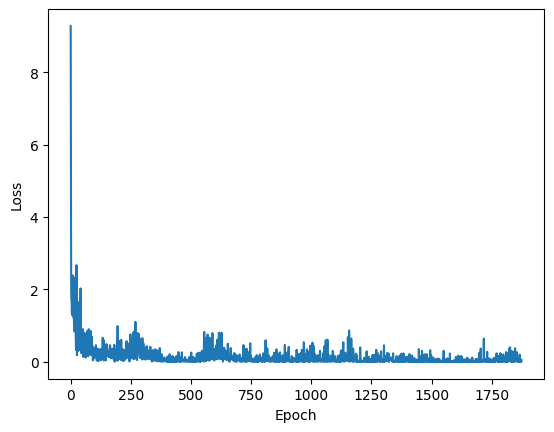

In [7]:
import matplotlib.pyplot as plt

plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()